In [1]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import talib as tl 
from matplotlib import style

plt.style.use('dark_background')
#plt.style.use('default')

start_date = "2015-10-27"
end_date = "2022-08-02"
stock1 = "AAPL"
df = yf.download([stock1], start = start_date, end = end_date)
#print('data fields downloaded:', set(df.columns.get_level_values(0)))

Momentum = pd.DataFrame()

[*********************100%***********************]  1 of 1 completed


In [2]:
# Moving Average Convergence Divergence (MACD)
df.ta.macd(close='close', fast=12, slow=26, append=True)
Momentum['MACD_12_26_9'], Momentum['MACDs_12_26_9'], Momentum['MACDh_12_26_9'] = df['MACD_12_26_9'], df['MACDs_12_26_9'], df['MACDh_12_26_9'] 




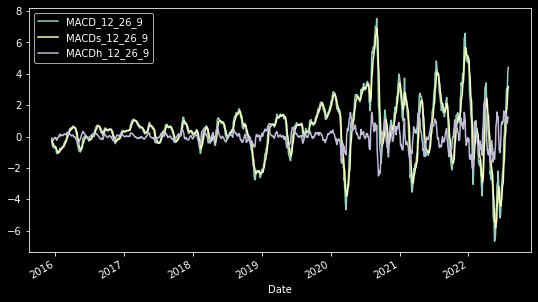

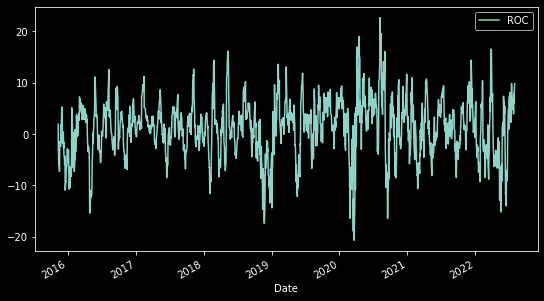

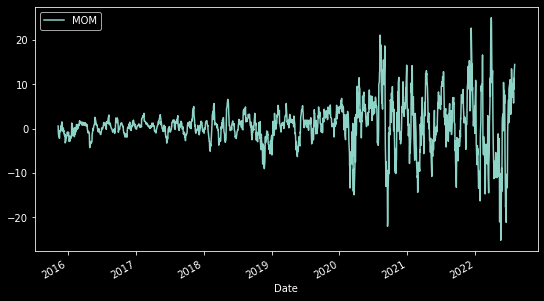

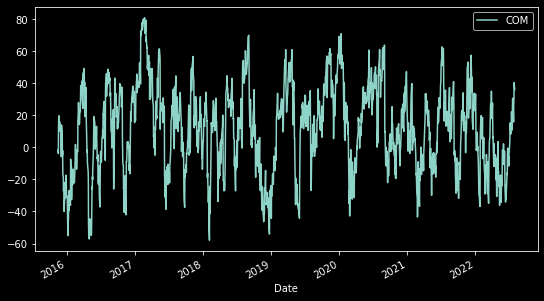

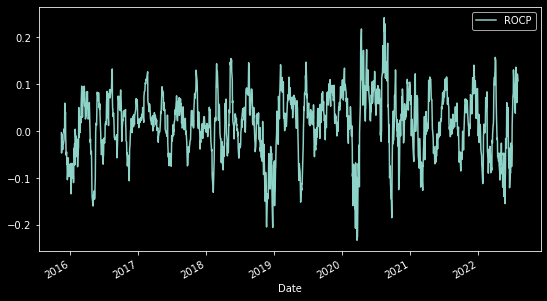

In [3]:
#---------------- Momentum --------------------
# Moving Average Convergence Divergence (MACD)
Momentum[['MACD_12_26_9','MACDs_12_26_9','MACDh_12_26_9']].plot(figsize=(9,5))
plt.show()

#Rate of Change (ROC)
Momentum['ROC'] = ta.roc(df['Close'])
Momentum[['ROC']].plot(figsize=(9,5))
plt.show()

#Momentum (MOM)
Momentum['MOM'] = ta.mom(df['Close'])
Momentum[['MOM']].plot(figsize=(9,5))
plt.show()

# Chande Momentum Oscillator (CMO)
Momentum['COM'] = ta.cmo(df['Close'])
Momentum[['COM']].plot(figsize=(9,5))
plt.show()

# Rate of change Percentage(ROCP)
Momentum['ROCP'] = tl.ROCP(df['Close'], 14)
Momentum[['ROCP']].plot(figsize=(9,5))
plt.show()



In [4]:
Momentum.shape

(1702, 7)

In [5]:
Momentum = Momentum.replace('?', np.nan)
Momentum.isnull().sum()

MACD_12_26_9     33
MACDs_12_26_9    33
MACDh_12_26_9    33
ROC              10
MOM              10
COM              14
ROCP             14
dtype: int64

In [6]:
def fill_missing(values):
    one_day = 60*24
    for row in range(Momentum.shape[0]):
        for col in range(Momentum.shape[1]):
            if np.isnan(values[row][col]):
                values[row,col] = values[row-one_day,col]

fill_missing(Momentum.values)
Momentum.isnull().sum()

MACD_12_26_9     0
MACDs_12_26_9    0
MACDh_12_26_9    0
ROC              0
MOM              0
COM              0
ROCP             0
dtype: int64

In [7]:
from sklearn.decomposition import PCA

# Initialize PCA model with number of components desired
pca = PCA(n_components=2)
# Fit PCA model to the data and transform it
X_transformed = pca.fit_transform(Momentum)

# The transformed data now has only 1 features
print(X_transformed.shape)

(1702, 2)


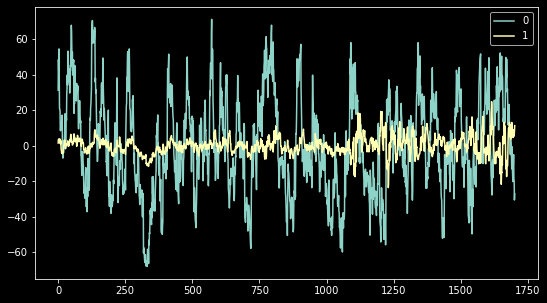

In [8]:
x = pd.DataFrame(X_transformed)
x.plot(figsize=(9,5))
plt.show()